# Assignment Feature engineering 1: From variables to features

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?
2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.
3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from scipy.stats.stats import ttest_ind
from scipy.stats import jarque_bera
from scipy.stats import normaltest
import statistics as st
import warnings

warnings.filterwarnings('ignore')
sns.set(style="dark")
%matplotlib inline

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

STUDENTS = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [3]:
STUDENTS.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Text(0.5, 1.0, 'histogram of writing score (box-cox transformed)')

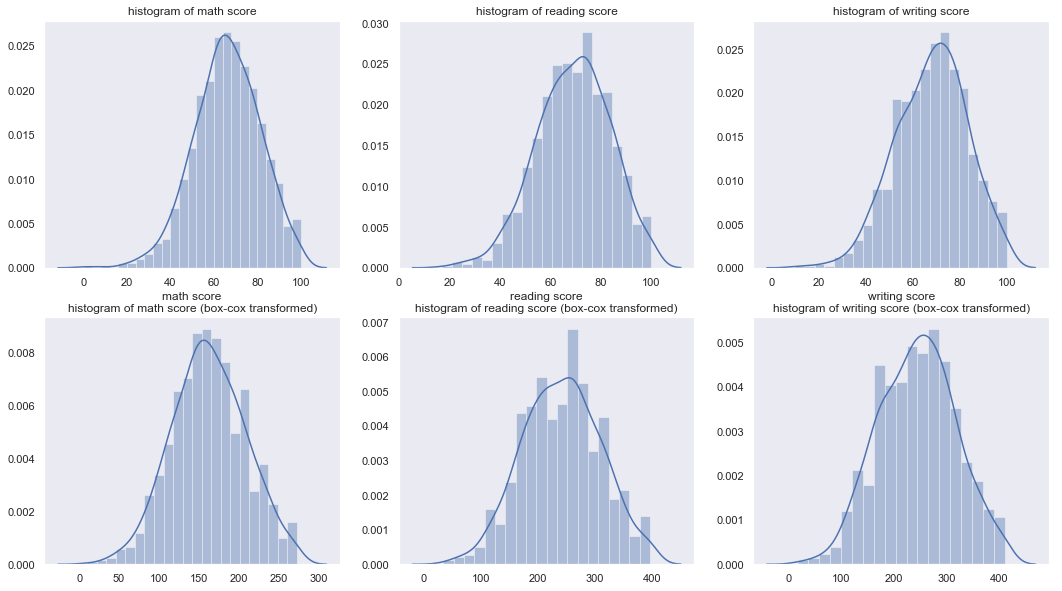

In [4]:
from scipy.stats import boxcox

# there is an observation with math score is equal to 0
# since box-cox transformation only works with positive data
# we are excluding it.
math_boxcox,_ = boxcox(STUDENTS[STUDENTS["math score"] > 0]["math score"])
reading_boxcox,_ = boxcox(STUDENTS["reading score"])
writing_boxcox,_ = boxcox(STUDENTS["writing score"])

plt.figure(figsize=(18,10))

plt.subplot(2, 3, 1)
sns.distplot(STUDENTS["math score"])
plt.title("histogram of math score")

plt.subplot(2, 3, 2)
sns.distplot(STUDENTS["reading score"])
plt.title("histogram of reading score")

plt.subplot(2, 3, 3)
sns.distplot(STUDENTS["writing score"])
plt.title("histogram of writing score")

plt.subplot(2, 3, 4)
sns.distplot(math_boxcox)
plt.title("histogram of math score (box-cox transformed)")

plt.subplot(2, 3, 5)
sns.distplot(reading_boxcox)
plt.title("histogram of reading score (box-cox transformed)")

plt.subplot(2, 3, 6)
sns.distplot(writing_boxcox)
plt.title("histogram of writing score (box-cox transformed)")

It appears the data isn't orginally normally distributed. I believe its less of the shape and more of the skew in distribution that causes the diviation from normal. The box-cox transformation had an interesting affect on the shape of the reading score, but we can test for normality. 

In [9]:
# using jarque_bera and normaltest we can test for normality of distributions
# they return a t-statistic and a p-value
print('Testing the original data')
print()
jb_stats = jarque_bera(STUDENTS["math score"])
norm_stats = normaltest(STUDENTS["math score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(STUDENTS["reading score"])
norm_stats = normaltest(STUDENTS["reading score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(STUDENTS["writing score"])
norm_stats = normaltest(STUDENTS["writing score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Testing the original data
Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974


The above tests results mean that these data series is not normally distributed

In [12]:
print('Testing After Box-Cox Transformation')
print()
jb_stats = jarque_bera(math_boxcox)
norm_stats = normaltest(math_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_boxcox)
norm_stats = normaltest(reading_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_boxcox)
norm_stats = normaltest(writing_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Testing After Box-Cox Transformation

Jarque-Bera test statistics is 1.720098104874378 and p value is 0.4231413256953709
Normality test statistics is 1.8323073377495822 and p value is 0.40005482895717037
Jarque-Bera test statistics is 4.119778575331906 and p value is 0.1274680814024559
Normality test statistics is 5.282274611852865 and p value is 0.07128015609575467
Jarque-Bera test statistics is 4.746478090040098 and p value is 0.09317842784055597
Normality test statistics is 6.267311355043339 and p value is 0.04355827085023795


The Box-Cox transformation made the series more normally distributed.

## Assignment - From variables to features

Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

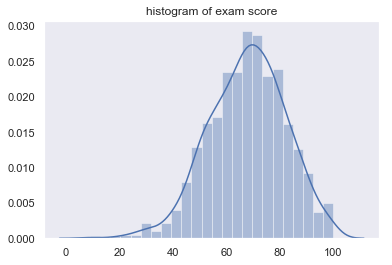

Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478


In [26]:
average = (STUDENTS["math score"] + STUDENTS["reading score"] + STUDENTS["writing score"])/3

sns.distplot(average)
plt.title("histogram of exam score")
plt.show()

jb_stats = jarque_bera(average)
norm_stats = normaltest(average)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

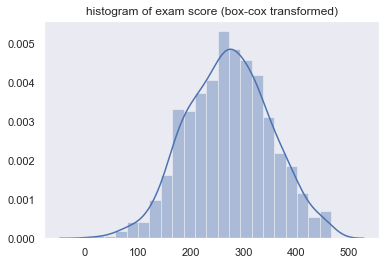

Jarque-Bera test statistics is 2.4353987431906026 and p value is 0.29591016374203183
Normality test statistics is 2.779857245981238 and p value is 0.2490930835165177


In [27]:
avg_box,_ = boxcox(average)

sns.distplot(avg_box)
plt.title("histogram of exam score (box-cox transformed)")
plt.show()

jb_stats = jarque_bera(avg_box)
norm_stats = normaltest(avg_box)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

After applying the box-cox transformation, the data is now more normally distributed. 

## Assignment - From variables to features

Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In [28]:
STUDENTS['average'] = avg_box

STUDENTS.corr()

,math score,reading score,writing score,average
math score,1.000000,0.817580,0.802642,0.916145
reading score,0.817580,1.000000,0.954598,0.968836
writing score,0.802642,0.954598,1.000000,0.963205
average,0.916145,0.968836,0.963205,1.000000


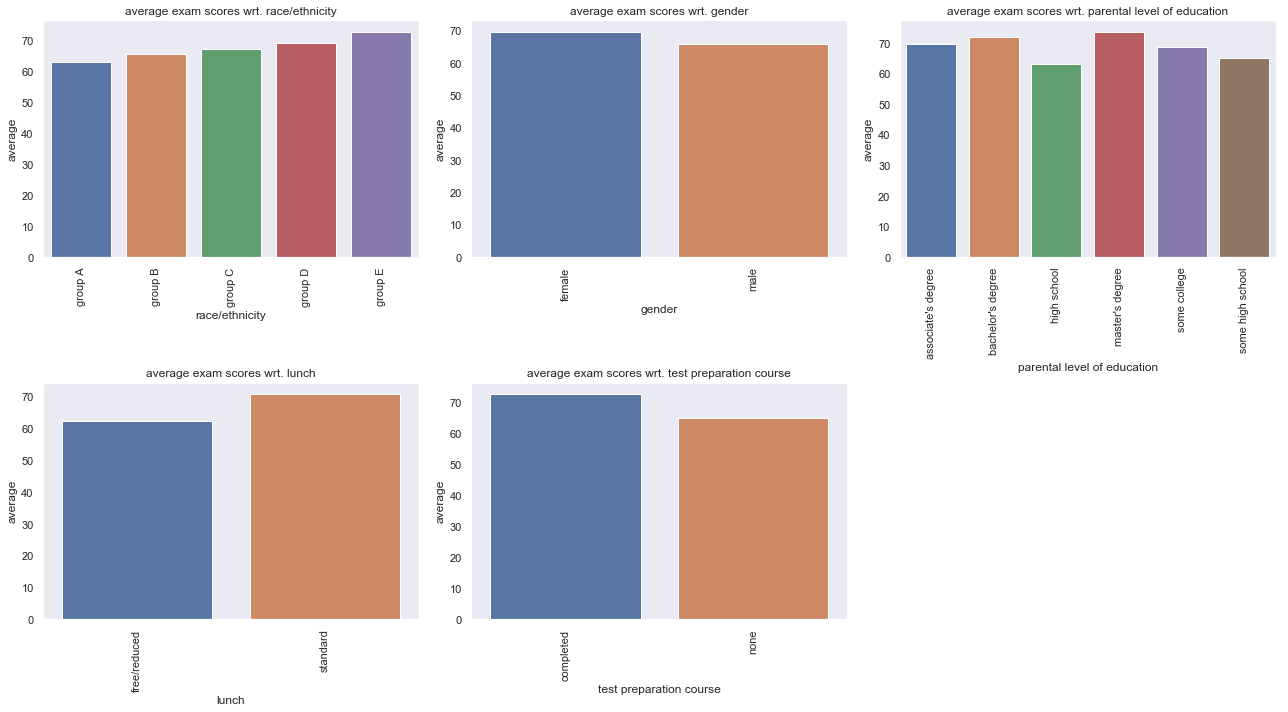

In [37]:
STUDENTS['average'] = average

plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
sns.barplot(STUDENTS.groupby("race/ethnicity")
        ['average'].mean().index, STUDENTS.groupby("race/ethnicity")['average'].mean())

plt.title("average exam scores wrt. race/ethnicity")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 2)
sns.barplot(STUDENTS.groupby("gender")
        ['average'].mean().index, STUDENTS.groupby("gender")['average'].mean())

plt.title("average exam scores wrt. gender")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 3)
sns.barplot(STUDENTS.groupby("parental level of education")
        ['average'].mean().index, STUDENTS.groupby("parental level of education")['average'].mean())

plt.title("average exam scores wrt. parental level of education")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 4)
sns.barplot(STUDENTS.groupby("lunch")
        ['average'].mean().index, STUDENTS.groupby("lunch")['average'].mean())

plt.title("average exam scores wrt. lunch")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 5)
sns.barplot(STUDENTS.groupby("test preparation course")
        ['average'].mean().index, STUDENTS.groupby("test preparation course")['average'].mean())

plt.title("average exam scores wrt. test preparation course")
plt.xticks(rotation="vertical")

plt.tight_layout()

Race/ethnicity seems to have an impact on average results that doesn't seem random. Females do better than males. Students with parents that don't seem to have at least some college seem to do worse on tests than students at other levels of education. Students on standard lunch perform better than students on reduced. Students who completed the test course seemed to outperform the students that did not.  